In [1]:
import numpy as np
import matplotlib.pyplot as mplot

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples =300, n_features=2, centers=2,cluster_std=1.0, random_state=101)

In [5]:
X,y = data

In [6]:
len(y)

300

In [7]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [8]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [9]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
features = pd.DataFrame(X)

In [11]:
features

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [12]:
features['noise'] = z_noise

In [13]:
features

,0,1,noise
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


In [14]:
features.columns = ['X1', 'X2', 'noise']
features.head()

,X1,X2,noise
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


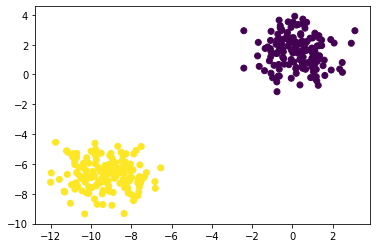

In [15]:
mplot.scatter(features['X1'], features['X2'], c=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [18]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [19]:
autoencoder = Sequential([encoder, decoder])

In [20]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5) )

In [21]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 8         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

In [24]:
scaled_data

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

In [25]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 4ms/sample - loss: 0.2875
Epoch 2/5
300/300 [==============================] - 0s 147us/sample - loss: 0.2260
Epoch 3/5
300/300 [==============================] - 0s 158us/sample - loss: 0.2203
Epoch 4/5
300/300 [==============================] - 0s 135us/sample - loss: 0.2260
Epoch 5/5
300/300 [==============================] - 0s 147us/sample - loss: 0.2191


In [26]:
encoded_2dim = encoder.predict(scaled_data)

In [27]:
encoded_2dim

array([[0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.1028521e-01],
       [0.0000000e+00, 7.3190176e-01],
       [0.0000000e+00, 3.1819403e-02],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.4152710e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.9753923e-01],
       [0.0000000e+00, 7.6321661e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.0833864e-01],
       [0.0000000e+00, 3.4918696e-02],
       [0.0000000e+00, 8.5570014e-01],
       [0.0000000e+00, 6.1998129e-02],
       [0.0000000e+00, 6.9509661e-01],
       [0.0000000e+00, 7.9127562e-01],
       [0.0000000e+00, 6.5370476e-01],
       [0.0000000e+00, 8.3051217e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.3875546e-01],
       [0.0000000e+00, 8.3679414e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.

In [28]:
scaled_data.shape

(300, 3)

In [29]:
encoded_2dim.shape

(300, 2)

In [30]:
encoded_2dim

array([[0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.1028521e-01],
       [0.0000000e+00, 7.3190176e-01],
       [0.0000000e+00, 3.1819403e-02],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.4152710e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.9753923e-01],
       [0.0000000e+00, 7.6321661e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.0833864e-01],
       [0.0000000e+00, 3.4918696e-02],
       [0.0000000e+00, 8.5570014e-01],
       [0.0000000e+00, 6.1998129e-02],
       [0.0000000e+00, 6.9509661e-01],
       [0.0000000e+00, 7.9127562e-01],
       [0.0000000e+00, 6.5370476e-01],
       [0.0000000e+00, 8.3051217e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.3875546e-01],
       [0.0000000e+00, 8.3679414e-01],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.

In [31]:
my_df = pd.DataFrame(encoded_2dim)

In [32]:
my_df.columns =['dim1', 'dim2']

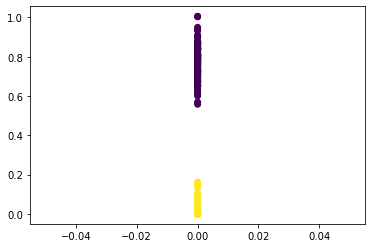

In [33]:
mplot.scatter(my_df['dim1'], my_df['dim2'], c=y)

<IPython.core.display.Javascript object>


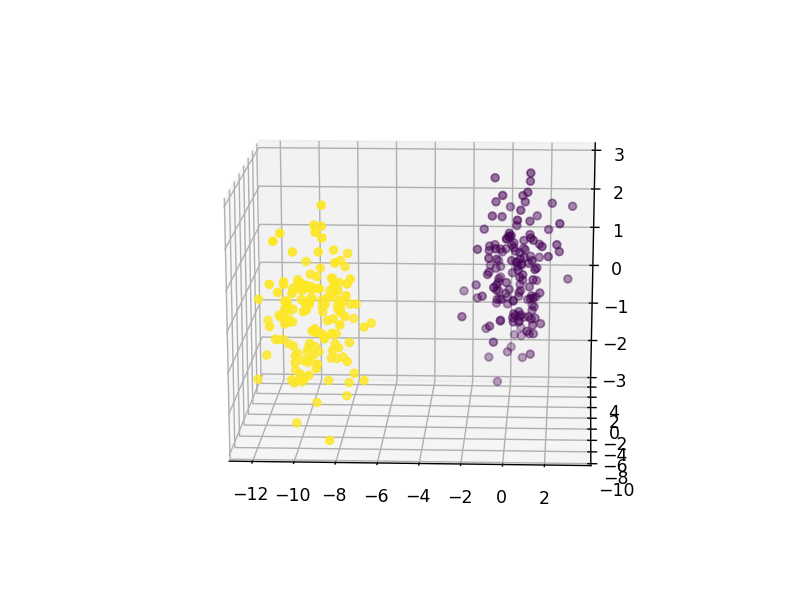

In [34]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = mplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'], features['X2'], features['noise'], c=y, )

